In [ ]:
#|default_exp fetch_coords

# Fetch Coords

> Utilities to fetch json file containing coordinates metadata

In [ ]:
#| eval: false
#| hide
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
#| hide
from nbdev.showdoc import *

In [ ]:
#| export

import requests
import json
from fastcore.all import L
import pandas as pd
from typing import Any
from urllib.parse import urlparse
from pathlib import Path
import numpy as np
import re
from shapely.geometry import Polygon, box
from shapely import wkt
import geopandas as gpd
import sqlite3 as sql3
from pandas.io import sql 
import sqlalchemy as sqalc

In [ ]:
#| exporti
from ntlights_damage_assessment.build_catalogs import DB
from ntlights_damage_assessment.catalogs import get_data

In [ ]:
#| hide
import matplotlib.pyplot as plt

In [ ]:
#| hide
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth',120)

In [ ]:
#| export

def get_coords(href, stem):
    data = get_data(href)
    shape = Polygon(data['geometry']['coordinates'][0])
    asset_href = data['assets']['image']['href']
    row = dict(
        stem=stem,
        asset_href=data['assets']['image']['href'],
        geometry=shape
    )
    return row

In [ ]:
stem = 'SVDNB_npp_d20180501_t0004098_e0009502_b33718_c20180501060951522600_noac_ops'

In [ ]:
href = 'https://globalnightlight.s3.amazonaws.com/npp_201805/SVDNB_npp_d20180501_t0004098_e0009502_b33718_c20180501060951522600_noac_ops.rade9.co.json'


In [ ]:
%%time
#| eval: false
row = get_coords(href,stem)

CPU times: user 41.9 ms, sys: 0 ns, total: 41.9 ms
Wall time: 1.27 s


In [ ]:
#| eval: false
row

{'stem': 'SVDNB_npp_d20180501_t0004098_e0009502_b33718_c20180501060951522600_noac_ops',
 'asset_href': 'https://globalnightlight.s3.amazonaws.com/npp_201805/SVDNB_npp_d20180501_t0004098_e0009502_b33718_c20180501060951522600_noac_ops.rade9.co.tif',
 'geometry': <shapely.geometry.polygon.Polygon>}

In [ ]:
date_param = '20180501'

In [ ]:
if '%' in date_param:
    query = f'select * from catalog_items where start_date like "{date_param}"'
else:
    query = f'select * from catalog_items where start_date = "{date_param}"' 

In [ ]:
#| eval: false
conn = sql3.connect(DB)

In [ ]:
%%time
#| eval: false
items_df = pd.read_sql_query(query,conn,dtype=str)

CPU times: user 719 ms, sys: 791 ms, total: 1.51 s
Wall time: 10.2 s


In [ ]:
#| eval: false
items_df.columns.values

array(['href', 'item_href', 'stem', 'suffix', 'base_url', 'folder',
       'product_id', 'start_date', 'first_scantime', 'end_scantime',
       'orbital_nbr', 'create_datetime', 'data_origin', 'data_domain',
       'vflag_file', 'vflag_href'], dtype=object)

In [ ]:
#| eval: false
items_df.head()

,href,item_href,stem,suffix,base_url,folder,product_id,start_date,first_scantime,end_scantime,orbital_nbr,create_datetime,data_origin,data_domain,vflag_file,vflag_href
0,./SVDNB_npp_d20180501_t0004098_e0009502_b33718_c20180501060951522600_noac_ops.rade9.co.json,https://globalnightlight.s3.amazonaws.com/npp_201805/SVDNB_npp_d20180501_t0004098_e0009502_b33718_c20180501060951522...,SVDNB_npp_d20180501_t0004098_e0009502_b33718_c20180501060951522600_noac_ops,rade9.co.json,https://globalnightlight.s3.amazonaws.com,npp_201805,SVDNB_npp,20180501,0004098,0009502,33718,20180501060951522600,noac,ops,npp_d20180501_t0004098_e0009502_b33718.vflag.co.tif,https://globalnightlight.s3.amazonaws.com/npp_201805/npp_d20180501_t0004098_e0009502_b33718.vflag.co.tif
1,./SVDNB_npp_d20180501_t0009514_e0015318_b33718_c20180501061532603366_noac_ops.rade9.co.json,https://globalnightlight.s3.amazonaws.com/npp_201805/SVDNB_npp_d20180501_t0009514_e0015318_b33718_c20180501061532603...,SVDNB_npp_d20180501_t0009514_e0015318_b33718_c20180501061532603366_noac_ops,rade9.co.json,https://globalnightlight.s3.amazonaws.com,npp_201805,SVDNB_npp,20180501,0009514,0015318,33718,20180501061532603366,noac,ops,npp_d20180501_t0009514_e0015318_b33718.vflag.co.tif,https://globalnightlight.s3.amazonaws.com/npp_201805/npp_d20180501_t0009514_e0015318_b33718.vflag.co.tif
2,./SVDNB_npp_d20180501_t0112274_e0118078_b33719_c20180501071808369542_noac_ops.rade9.co.json,https://globalnightlight.s3.amazonaws.com/npp_201805/SVDNB_npp_d20180501_t0112274_e0118078_b33719_c20180501071808369...,SVDNB_npp_d20180501_t0112274_e0118078_b33719_c20180501071808369542_noac_ops,rade9.co.json,https://globalnightlight.s3.amazonaws.com,npp_201805,SVDNB_npp,20180501,0112274,0118078,33719,20180501071808369542,noac,ops,npp_d20180501_t0112274_e0118078_b33719.vflag.co.tif,https://globalnightlight.s3.amazonaws.com/npp_201805/npp_d20180501_t0112274_e0118078_b33719.vflag.co.tif
3,./SVDNB_npp_d20180501_t0118090_e0123494_b33719_c20180501072349439701_noac_ops.rade9.co.json,https://globalnightlight.s3.amazonaws.com/npp_201805/SVDNB_npp_d20180501_t0118090_e0123494_b33719_c20180501072349439...,SVDNB_npp_d20180501_t0118090_e0123494_b33719_c20180501072349439701_noac_ops,rade9.co.json,https://globalnightlight.s3.amazonaws.com,npp_201805,SVDNB_npp,20180501,0118090,0123494,33719,20180501072349439701,noac,ops,npp_d20180501_t0118090_e0123494_b33719.vflag.co.tif,https://globalnightlight.s3.amazonaws.com/npp_201805/npp_d20180501_t0118090_e0123494_b33719.vflag.co.tif
4,./SVDNB_npp_d20180501_t0123507_e0129293_b33719_c20180501072930507231_noac_ops.rade9.co.json,https://globalnightlight.s3.amazonaws.com/npp_201805/SVDNB_npp_d20180501_t0123507_e0129293_b33719_c20180501072930507...,SVDNB_npp_d20180501_t0123507_e0129293_b33719_c20180501072930507231_noac_ops,rade9.co.json,https://globalnightlight.s3.amazonaws.com,npp_201805,SVDNB_npp,20180501,0123507,0129293,33719,20180501072930507231,noac,ops,npp_d20180501_t0123507_e0129293_b33719.vflag.co.tif,https://globalnightlight.s3.amazonaws.com/npp_201805/npp_d20180501_t0123507_e0129293_b33719.vflag.co.tif


In [ ]:
#| export

def get_rows(items_df):
    rows = []
    for i in range(len(items_df)):
        item = items_df.iloc[i]
        row = get_coords(item.item_href, item.stem)
        rows.append(row) 
    return rows

In [ ]:
%%time
#| eval: false
rows = get_rows(items_df)

CPU times: user 4.06 s, sys: 0 ns, total: 4.06 s
Wall time: 2min 49s


In [ ]:
#| eval: false
rows_df = pd.DataFrame.from_records(rows)

In [ ]:
#| eval: false
rows_df.columns.values

array(['stem', 'asset_href', 'geometry'], dtype=object)

In [ ]:
#| eval: false
rows_df.dtypes

stem          object
asset_href    object
geometry      object
dtype: object

In [ ]:
#| eval: false
rows_gdf = gpd.GeoDataFrame(rows_df, geometry='geometry', crs='EPSG:4326')

In [ ]:
#| eval: false
rows_wkt  = rows_gdf.to_wkt()

In [ ]:
#| eval: false
rows_wkt.dtypes

stem          object
asset_href    object
geometry      object
dtype: object

In [ ]:
#| exporti

create_coords_cache_sql = '''
CREATE TABLE IF NOT EXISTS "coords_cache" (
  "stem" TEXT,
  "asset_href" TEXT,
  "geometry" TEXT
);
CREATE INDEX cache_index on coords_cache(stem);
'''
drop_coords_cache_sql = '''
DROP TABLE IF EXISTS coords_cache;
'''


In [ ]:
# conn.executescript(drop_coords_cache_sql);

In [ ]:
# conn.executescript(create_coords_cache_sql);

In [ ]:
# %%time
#| eval: false

# row_count = rows_wkt.to_sql('coords_cache', conn, if_exists='append', index=False, method='multi')

In [ ]:
#| export

def add_cache_coords(items_df, cache_table='coords_cache'):
    rows = get_rows(items_df)
    rows_df = pd.DataFrame.from_records(rows)
    rows_gdf = gpd.GeoDataFrame(rows_df, geometry='geometry', crs='EPSG:4326')
    rows_wkt  = rows_gdf.to_wkt()
    conn = sql3.connect(DB)
    row_count = rows_wkt.to_sql(cache_table, conn, if_exists='append', index=False, method='multi')
    conn.close()
    return row_count

In [ ]:
#| exporti

joined_query_template = '''
with item as ( 
  select *
  from catalog_items
),
cache as (
  select *
  from coords_cache
),
item_cache as (
  select item.*,
         ifnull(cache.stem,'NA') as cache_stem,
         cache.asset_href,
         cache.geometry
  from item
  left join cache
  on item.stem = cache.stem
)
select * from item_cache
where {}
'''
  

In [ ]:
#| export

def fetch_cached_coordinates(conn, date_param=None, criteria=None):
    if criteria is not None:
        pass
    elif date_param is None:
        raise ValueError('date_param and criteria cannot both be None')
    elif '%' in date_param:
        criteria = f'start_date like "{date_param}"'
    else:
        criteria = f'start_date = "{date_param}"' 
    joined_query = joined_query_template.format(criteria)

    conn = sql3.connect(DB)
    joined_df = pd.read_sql_query(joined_query, conn, dtype=str)
    conn.close()
    return joined_df

In [ ]:
%%time
#| eval: false
cached_df = fetch_cached_coordinates('20180501')

CPU times: user 44.8 ms, sys: 108 ms, total: 152 ms
Wall time: 151 ms


In [ ]:
assert len(cached_df[cached_df.cache_stem == 'NA']) == 0

In [ ]:
%%time
#| eval: false
cached_df2 = fetch_cached_coordinates('20121015')

CPU times: user 23.6 ms, sys: 96.9 ms, total: 121 ms
Wall time: 121 ms


In [ ]:
#| eval: false
assert len(cached_df2[cached_df2.stem == cached_df2.cache_stem]) == 0

In [ ]:
#| export

def search_and_cache_dates(date_param=None, criteria=None):
    joined_df = fetch_cached_coordinates(date_param=date_param,criteria=criteria)
    uncached = joined_df[joined_df.cache_stem == 'NA']
    if len(uncached) > 0:
        add_cache_coords(uncached) # add missing uncached entries -- can be slow
        joined_df = fetch_cached_coordinates(date_param=date_param, criteria=criteria) 
    return joined_df

In [ ]:
%%time
#| eval: false
joined_df = search_and_cache_dates(date_param='20180501')

CPU times: user 31.9 ms, sys: 87.8 ms, total: 120 ms
Wall time: 119 ms


In [ ]:
#| export

def convert_joined_gdf(joined_df, crs='EPSG:4326'):
    joined_df['geometry'] = joined_df.geometry.apply(wkt.loads)
    joined_gdf = gpd.GeoDataFrame(joined_df, geometry='geometry', crs=crs)
    return joined_gdf

In [ ]:
#| eval: false
joined_gdf = convert_joined_gdf(joined_df)

In [ ]:
aoi = gpd.read_file('../data/admin_areas/ph_admin_bbox_wgs84.geojson')

CPU times: user 290 ms, sys: 2.82 ms, total: 293 ms
Wall time: 234 ms


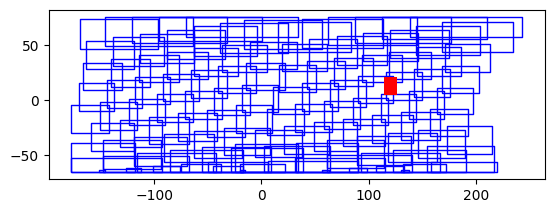

In [ ]:
%%time
#| eval: false
ax = plt.axes()
ax = joined_gdf.plot(ax=ax, facecolor='none', edgecolor='blue')
ax = aoi.plot(ax=ax,color='red')

In [ ]:
#| eval: false
filtered_gdf = joined_gdf.sjoin(aoi,how='inner',predicate='intersects')

In [ ]:
#| eval: false
filtered_gdf.drop(columns='index_right',inplace=True)

In [ ]:
#| export
def search_dates_aoi(aoi:gpd.GeoDataFrame, 
                    date_param:str=None, 
                    criteria:str=None, 
                    crs='EPSG:4326'):
    joined_df = search_and_cache_dates(date_param=date_param, criteria=criteria)
    joined_gdf = convert_joined_gdf(joined_df, crs=crs)
    filtered_gdf = joined_gdf.sjoin(aoi[['geometry']],how='inner',predicate='intersects')
    filtered_gdf.drop(columns='index_right',inplace=True)
    return filtered_gdf

In [ ]:
%%time
#| eval: false
phl_matched20180501 = search_dates_aoi(aoi, date_param='20180501')

CPU times: user 73.6 ms, sys: 104 ms, total: 178 ms
Wall time: 177 ms
